In [1]:
# Dependencies should be installed with miniconda/anaconda because some require native libraries that are tedious to build
# $ conda env create -f environment.yml

import geopandas as gp
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Load the topology file

g = nx.read_graphml("Cogentco.graphml")
nodes = {"id": [], "geometry": []}
edges = []

for node, attrs in g.nodes(data=True):
    if "Latitude" not in attrs or "Longitude" not in attrs:
        continue

    lat1, lon1 = attrs["Longitude"], attrs["Latitude"]
    nodes["id"].append(int(node))
    nodes["geometry"].append(Point(lat1, lon1))

    for src, dst in g.edges(node):
        attrs = g.nodes[dst]

        if "Latitude" not in attrs or "Longitude" not in attrs:
            continue

        lat2, lon2 = attrs["Longitude"], attrs["Latitude"]
        edges.append(LineString([(lat1, lon1), (lat2, lon2)]))

In [3]:
# Load and clip the map. The map files are downloaded from: https://www.naturalearthdata.com/
world = gp.read_file("ne_10m_admin_0_countries")
world = gp.clip(world, (-140, 0, 50, 75))

<Axes: >

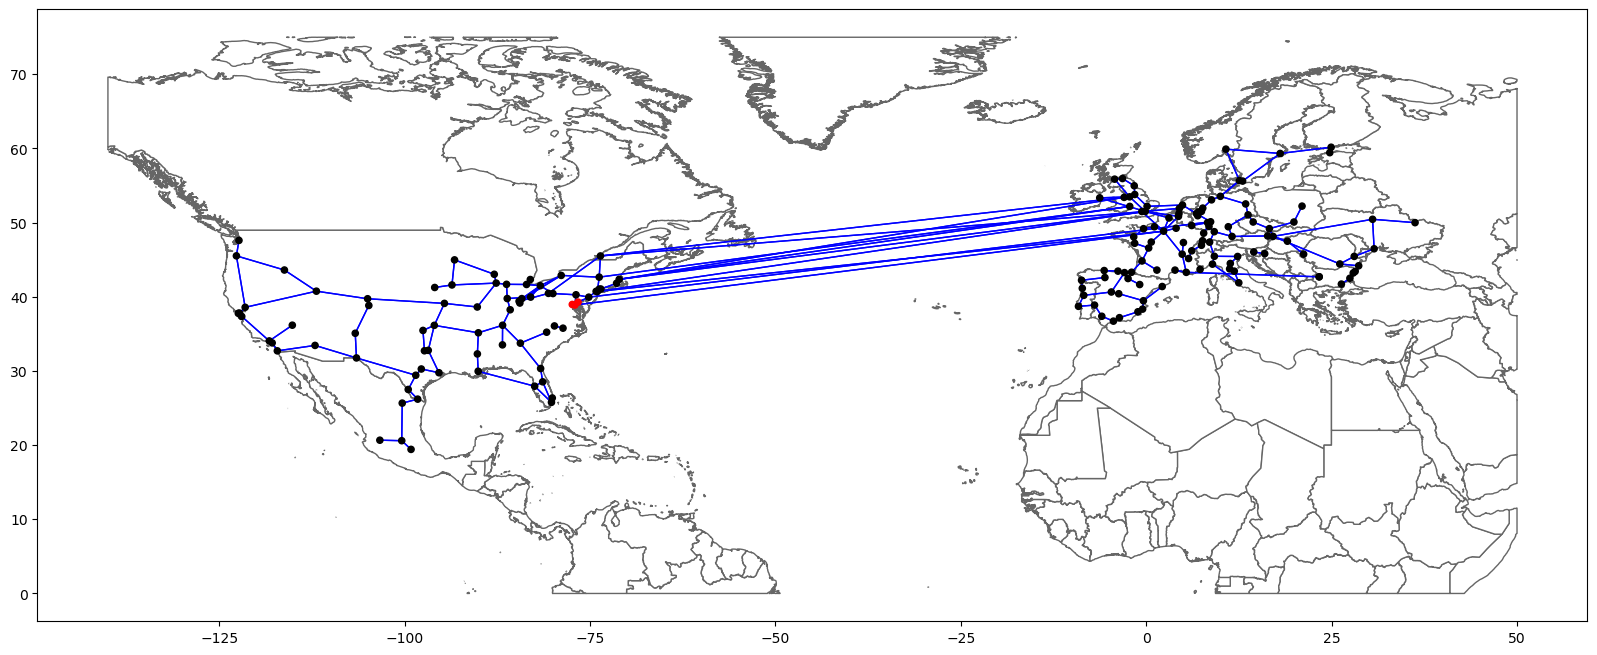

In [4]:
base = world.plot(figsize=(20, 10), color="white", edgecolor=(0.4, 0.4, 0.4))

# Draw the edges
gdf = gp.GeoSeries(edges)
gdf.plot(ax=base, color="blue", linewidth=1)

# Draw the nodes
gdf = gp.GeoDataFrame(nodes)
# Add a new column indicating the color of each node. Nodes 146, 154, 159 are colored red in this case.
gdf["color"] = gdf["id"].map(lambda i: "red" if i in [146, 154, 159] else "black")
gdf.plot(ax=base, color=gdf["color"], markersize=20, zorder=2)